In [ ]:
#Three Trends:

-Urban cities take the most number of uber rides and have the cheapest average fares.
-Urban cities also have the most uber drivers in relation to Rural and Suburban cities.
-Less than 3% of total drivers are in a rural city.  

In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cities_pd = pd.read_csv("data/city_data.csv")
#cities_pd.head()
ride_pd = pd.read_csv("data/ride_data.csv")
#ride_pd.head()

# Combine the data into a single dataset

combined_data = pd.merge(cities_pd, ride_pd, how='outer', on='city')
#combined_data

# Display the data table for preview
organized_data = combined_data[['city', 'date', 'fare', 'ride_id', 'driver_count','type']]
organized_data.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

group_city = combined_data.groupby(["city","type"])
#group_city.head()
avg_fare_city=group_city.mean()['fare']
#avg__fare_city.head()  
total_count=group_city['ride_id'].count()
#city_count.head()
total_driver = group_city["driver_count"].mean()
#total_driver

pyber_df= pd.DataFrame({"average fare ($)": avg_fare_city, "total rider":total_count,"total driver":total_driver})
#pyber_df
pyber_df=pyber_df.reset_index()

df_urban = pyber_df.loc[pyber_df["type"] == "Urban",:]
#df_urban
df_rural = pyber_df.loc[pyber_df["type"] == "Rural",:]
#df_rural
df_suburban=pyber_df.loc[pyber_df["type"] == "Suburban",:]
#df_suburban

<IPython.core.display.Javascript object>


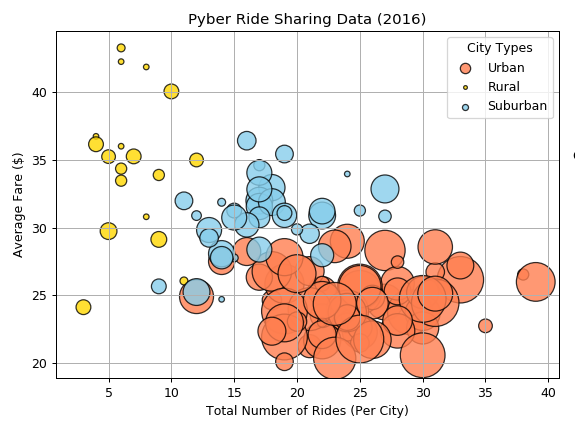

In [3]:
# Build the scatter plots for each city types

plt.scatter(df_urban["total rider"],df_urban["average fare ($)"],
            s = df_urban["total driver"]*20, marker="o",color ="Coral", 
            edgecolors="black", alpha =0.8, label = "Urban")
plt.scatter(df_rural["total rider"],df_rural["average fare ($)"],
            s = df_rural["total driver"]*20, marker="o",color ="Gold", 
            edgecolors="black", alpha =0.8, label = "Rural")
plt.scatter(df_suburban["total rider"],df_suburban["average fare ($)"],
            s = df_suburban["total driver"]*20, marker="o",color ="SkyBlue", 
            edgecolors="black", alpha =0.8, label = "Suburban")


In [4]:
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.tight_layout()

# Create a legend
plt.legend(title="City Types", loc = "upper right", markerscale=0.3)

# Incorporate a text label regarding circle size
plt.text(42,37,"Note:")
plt.text(42,35,"Cirle size correlates with driver count per city.")

plt.grid()

# Save Figure
plt.savefig("Pyber Ride sharing Bubble Plot.png")

## Total Fares by City Type

<IPython.core.display.Javascript object>


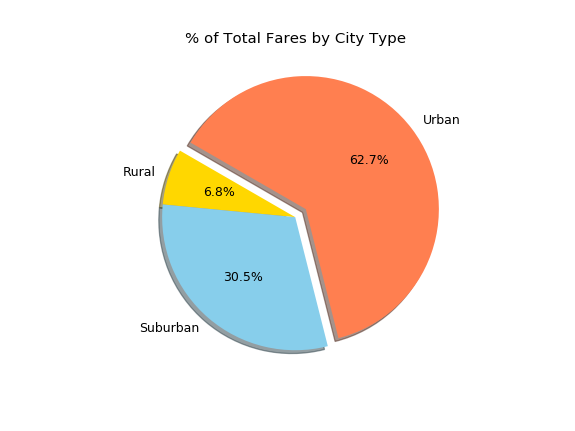

In [5]:
# Calculate Type Percents

combine_type= combined_data.groupby(["type"])
total_fare = combine_type ["fare"].sum()
total_fare = pd.DataFrame({"Total Fare":total_fare})

# Build Pie Chart
colors = [ "Gold", "SkyBlue","Coral"]
explode = (0, 0, 0.1)
total_fare.plot(kind = "pie",y=total_fare.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Fares by City Type", legend= False,shadow=True)
plt.axis('off')


# Save Figure
plt.savefig("Pyber Total Fares Pie Chart")

## Total Rides by City Type

<IPython.core.display.Javascript object>


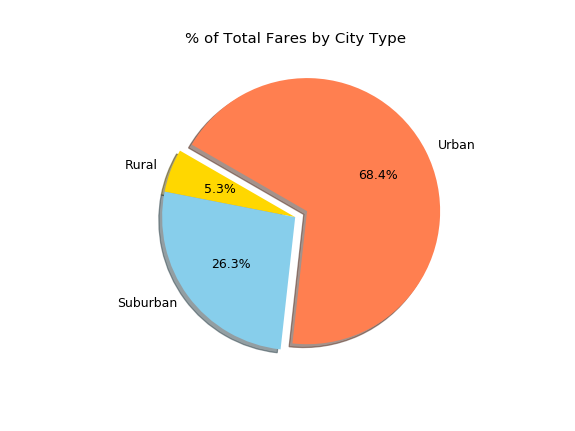

In [6]:
# Calculate Ride Percents
combine_type= combined_data.groupby(["type"])
total_rides = combine_type ["ride_id"].count()
total_ride = pd.DataFrame({"Total Ride":total_rides})

# Build Pie Chart
colors = [ "Gold", "SkyBlue","Coral"]
explode = (0, 0, 0.1)
total_ride.plot(kind = "pie",y=total_ride.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Fares by City Type", legend= False,shadow=True)
plt.axis('off')

# Save Figure
plt.savefig("Pyber Total Rides by City Type")

In [ ]:
pyber_df.head()

## Total Drivers by City Type

<IPython.core.display.Javascript object>


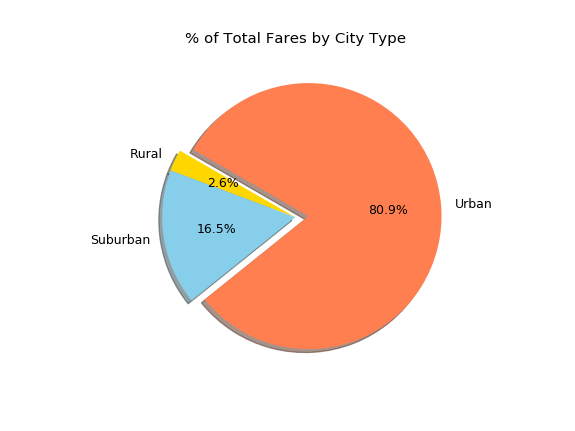

In [7]:
# Calculate Ride Percents
combine_type= pyber_df.groupby(["type"])
total_drivers = combine_type.sum()["total driver"]
drivers = pd.DataFrame({"total driver":total_drivers})

# Build Pie Chart
colors = [ "Gold", "SkyBlue","Coral"]
explode = (0, 0, 0.1)
drivers.plot(kind = "pie",y=drivers.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Fares by City Type", legend= False,shadow=True)
plt.axis('off')
# Save Figure
plt.savefig("Pyber Total Drivers by City Type")